In [23]:
from tqdm.notebook import tqdm
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.alert import Alert

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager    # 매 번 크롬 드라이버를 설치할 필요없이 자동으로
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.alert import Alert
from tqdm import tqdm_notebook
from urllib.request import urlopen
import time
import requests
import re
import os
import win32com.client as win32
#pip install pypiwin32


# 엑셀 변환 함수
#def convert_xls_to_xlsx(xls_file_path, xlsx_file_path):
#    excel = win32.Dispatch("Excel.Application")
#    excel.DisplayAlerts = False
#    wb = excel.Workbooks.Open(xls_file_path)
#    wb.SaveAs(xlsx_file_path, FileFormat=51)  # FileFormat=51 corresponds to .xlsx
#     wb.Close()
#     excel.Quit()

    
#input_folder = 'C:\\Users\\acorn\\Downloads'
#output_folder = 'C:\\xlsx'


# for file_name in os.listdir(input_folder):
#     if file_name.endswith('.xls'):
#         input_file_path = os.path.join(input_folder, file_name)
#         output_file_name = file_name.replace('.xls', '.xlsx')
#         output_file_path = os.path.join(output_folder, output_file_name)

#         print(f"Converting {input_file_path} to {output_file_path}")
#         convert_xls_to_xlsx(input_file_path, output_file_path)
#         print(f"Conversion complete for {output_file_path}")
        
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"]=False
# .pyplot 모듈

In [ ]:
import pandas as pd

In [ ]:
시리즈가 주는 관람객 수 증가량

In [13]:
data = pd.read_csv("C:\\GitTest\\10M_Movie\\movie_DB\individual_movie\\movie_info_final.csv")


df = pd.DataFrame(data)
df.head()

,Title,Release,Genre,Age,Nation,Type,Director,Main_actor,Audi
0,명량,2014-07-30,"사극,액션",15세이상관람가,한국,"필름,2D,4D",김한민,"최민식,류승룡,조진웅",17615919
1,극한직업,2019-01-23,코미디,15세이상관람가,한국,2D,이병헌,"류승룡,이하늬,진선규,이동휘,공명",16266338
2,신과함께-죄와 벌,2017-12-20,"판타지,드라마",12세이상관람가,한국,"2D,4D",김용화,"하정우,차태현,주지훈,김향기,마동석",14414658
3,국제시장,2014-12-17,드라마,12세이상관람가,한국,"필름,2D",윤제균,"황정민,김윤진,오달수,정진영",14264478
4,어벤져스: 엔드게임,2019-04-24,"액션,SF",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",13977602


In [14]:
# 타이틀 인덱스 지정
#f.set_index('Title', inplace=True)
df

,Title,Release,Genre,Age,Nation,Type,Director,Main_actor,Audi
0,명량,2014-07-30,"사극,액션",15세이상관람가,한국,"필름,2D,4D",김한민,"최민식,류승룡,조진웅",17615919
1,극한직업,2019-01-23,코미디,15세이상관람가,한국,2D,이병헌,"류승룡,이하늬,진선규,이동휘,공명",16266338
2,신과함께-죄와 벌,2017-12-20,"판타지,드라마",12세이상관람가,한국,"2D,4D",김용화,"하정우,차태현,주지훈,김향기,마동석",14414658
3,국제시장,2014-12-17,드라마,12세이상관람가,한국,"필름,2D",윤제균,"황정민,김윤진,오달수,정진영",14264478
4,어벤져스: 엔드게임,2019-04-24,"액션,SF",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",13977602
...,...,...,...,...,...,...,...,...,...
197,해리 포터와 불의 잔,2005-12-01,"액션,판타지",12세관람가,미국,"필름,4D",마이크 뉴웰,"다니엘 래드클리프,루퍼트 그린트,엠마 왓슨,랄프 파인즈",3499257
198,비긴 어게인,2014-08-13,멜로/로맨스,15세이상관람가,미국,"필름,2D",존 카니,"키이라 나이틀리,마크 러팔로,애덤 리바인,헤일리 스테인펠드,제임스 코든,캐서린 키너",3477672
199,태풍,2005-12-14,"드라마,액션",15세관람가,한국,"필름,2D",곽경택,"이정재,이미연,장동건",3471150
200,킹콩,2005-12-14,"드라마,어드벤처",15세관람가,미국,필름,피터 잭슨,"잭 블랙,애드리언 브로디,나오미 왓츠",3470059


In [15]:

import re

# mcu
for title in df["Title"]:
    strings = re.findall("어벤져스", title)
    if len(strings) > 0:
        print(title)

print("--------------------------------")
for title in df["Title"]:
    strings = re.findall("스파이더맨", title)
    if len(strings) > 0:
        print(title)
        
print("--------------------------------")
for title in df["Title"]:
    strings = re.findall("아이언맨", title)
    if len(strings) > 0:
        print(title)
        
print("--------------------------------")
        
for title in df["Title"]:
    strings = re.findall("토르", title)
    if len(strings) > 0:
        print(title)
        
print("--------------------------------")
for title in df["Title"]:
    strings = re.findall("캡틴", title)
    if len(strings) > 0:
        print(title)
    
print("--------------------------------")
for title in df["Title"]:
    strings = re.findall("스트레인지", title)
    if len(strings) > 0:
        print(title)

print("--------------------------------")
for title in df["Title"]:
    strings = re.findall("블랙 팬서", title)
    if len(strings) > 0:
        print(title)

print("--------------------------------")
for title in df["Title"]:
    strings = re.findall("앤트맨", title)
    if len(strings) > 0:
        print(title)
print("--------------------------------")
####### 200위권 밖
for title in df["Title"]:
    strings = re.findall("헐크", title)
    if len(strings) > 0:
        print(title)
        
        
for title in df["Title"]:
    strings = re.findall("가디언", title)
    if len(strings) > 0:
        print(title)

어벤져스: 엔드게임
어벤져스: 인피니티 워
어벤져스: 에이지 오브 울트론
어벤져스
--------------------------------
스파이더맨: 파 프롬 홈
스파이더맨: 노 웨이 홈
스파이더맨: 홈 커밍
어메이징 스파이더맨
스파이더맨 3
어메이징 스파이더맨 2
--------------------------------
아이언맨 3
아이언맨 2
아이언맨
--------------------------------
토르: 라그나로크
--------------------------------
캡틴 아메리카: 시빌 워
캡틴 마블
캡틴 아메리카: 윈터 솔져
--------------------------------
닥터 스트레인지: 대혼돈의 멀티버스
닥터 스트레인지
--------------------------------
블랙 팬서
--------------------------------
앤트맨과 와스프
--------------------------------


In [44]:
# 타이틀. 관객수
# 특정 타이틀 뽑기

print("--------------------------------")
        
for title in df["Title"]:
    strings = re.findall("알라딘", title)
    if len(strings) > 0:
        print(title)
        

print("--------------------------------")

for title in df["Title"]:
    strings = re.findall("라이온 킹", title)
    if len(strings) > 0:
        print(title)
        
        
print("--------------------------------")

for title in df["Title"]:
    strings = re.findall("미녀와 야수", title)
    if len(strings) > 0:
        print(title)
            
print("--------------------------------")
# 반도포함
for title in df["Title"]:
    strings = re.findall("부산행", title)
    if len(strings) > 0:
        print(title)

print("--------------------------------")
# 최후의 기사 순위권 밖?
for title in df["Title"]:
    strings = re.findall("트랜스포머", title)
    if len(strings) > 0:
        print(title)

        
print("--------------------------------")
# 
for title in df["Title"]:
    strings = re.findall("임파서블", title)
    if len(strings) > 0:
        print(title)
        
print("--------------------------------")
# 
for title in df["Title"]:
    strings = re.findall("배트맨", title)
    if len(strings) > 0:
        print(title)        
        
print("--------------------------------")
# 
for title in df["Title"]:
    strings = re.findall("킹스맨", title)
    if len(strings) > 0:
        print(title)
        
print("--------------------------------")
# 
for title in df["Title"]:
    strings = re.findall("타짜", title)
    if len(strings) > 0:
        print(title)
        
print("--------------------------------")
# 
for title in df["Title"]:
    strings = re.findall("쥬라기", title)
    if len(strings) > 0:
        print(title)
        
        
print("--------------------------------")
# 
for title in df["Title"]:
    strings = re.findall("해리포터", title)
    if len(strings) > 0:
        print(title)
        
print("--------------------------------")
# 
for title in df["Title"]:
    strings = re.findall("반지의", title)
    if len(strings) > 0:
        print(title)
        
print("--------------------------------")
# 
for title in df["Title"]:
    strings = re.findall("반도", title)
    if len(strings) > 0:
        print(title)

--------------------------------
알라딘
--------------------------------
라이온 킹
--------------------------------
미녀와 야수
--------------------------------
부산행
--------------------------------
트랜스포머 3
트랜스포머
트랜스포머: 패자의 역습
트랜스포머: 사라진 시대
--------------------------------
미션임파서블:고스트프로토콜
미션 임파서블: 폴아웃
미션 임파서블: 로그네이션
미션 임파서블 3
--------------------------------
--------------------------------
킹스맨 : 시크릿 에이전트
킹스맨: 골든 서클
--------------------------------
타짜
타짜-신의 손
--------------------------------
쥬라기 월드: 폴른 킹덤
쥬라기 월드
--------------------------------
해리포터와 죽음의 성물2
--------------------------------
--------------------------------
반도


In [34]:
#  mcu

result = pd.concat([
    df.loc[:, ["Title", "Audi","Release"]][df['Title'] == "어벤져스"],
    df.loc[:, ["Title", "Audi","Release"]][df['Title'] == "어벤져스: 인피니티 워"],
    df.loc[:, ["Title", "Audi","Release"]][df['Title'] == "어벤져스: 엔드게임"],
    df.loc[:, ["Title", "Audi","Release"]][df['Title'] == "어벤져스: 에이지 오브 울트론"],
    df.loc[:, ["Title", "Audi","Release"]][df['Title'] == "스파이더맨: 파 프롬 홈"],
    df.loc[:, ["Title", "Audi","Release"]][df['Title'] == "스파이더맨: 노 웨이 홈"],
    df.loc[:, ["Title", "Audi","Release"]][df['Title'] == "스파이더맨: 홈 커밍"],
    df.loc[:, ["Title", "Audi","Release"]][df['Title'] == "아이언맨"],
    df.loc[:, ["Title", "Audi","Release"]][df['Title'] == "아이언맨 2"],
    df.loc[:, ["Title", "Audi","Release"]][df['Title'] == "아이언맨 3"],
    df.loc[:, ["Title", "Audi","Release"]][df['Title'] == "토르: 라그나로크"],
    df.loc[:, ["Title", "Audi","Release"]][df['Title'] == "캡틴 아메리카: 시빌 워"],
    df.loc[:, ["Title", "Audi","Release"]][df['Title'] == "캡틴 아메리카: 윈터 솔져"],
    df.loc[:, ["Title", "Audi","Release"]][df['Title'] == "캡틴 마블"],
    df.loc[:, ["Title", "Audi","Release"]][df['Title'] == "닥터 스트레인지"],
    df.loc[:, ["Title", "Audi","Release"]][df['Title'] == "닥터 스트레인지: 대혼돈의 멀티버스"],
    df.loc[:, ["Title", "Audi","Release"]][df['Title'] == "블랙 팬서"],
    df.loc[:, ["Title", "Audi","Release"]][df['Title'] == "앤트맨과 와스프"],
]).sort_values("Release")
result

,Title,Audi,Release
152,아이언맨,4313102,2008-04-30
145,아이언맨 2,4452900,2010-04-29
60,어벤져스,7087971,2012-04-26
34,아이언맨 3,9001679,2013-04-25
169,캡틴 아메리카: 윈터 솔져,3984814,2014-03-26
25,어벤져스: 에이지 오브 울트론,10504487,2015-04-23
35,캡틴 아메리카: 시빌 워,8678761,2016-04-27
95,닥터 스트레인지,5447269,2016-10-26
55,스파이더맨: 홈 커밍,7258678,2017-07-05
120,토르: 라그나로크,4858572,2017-10-25


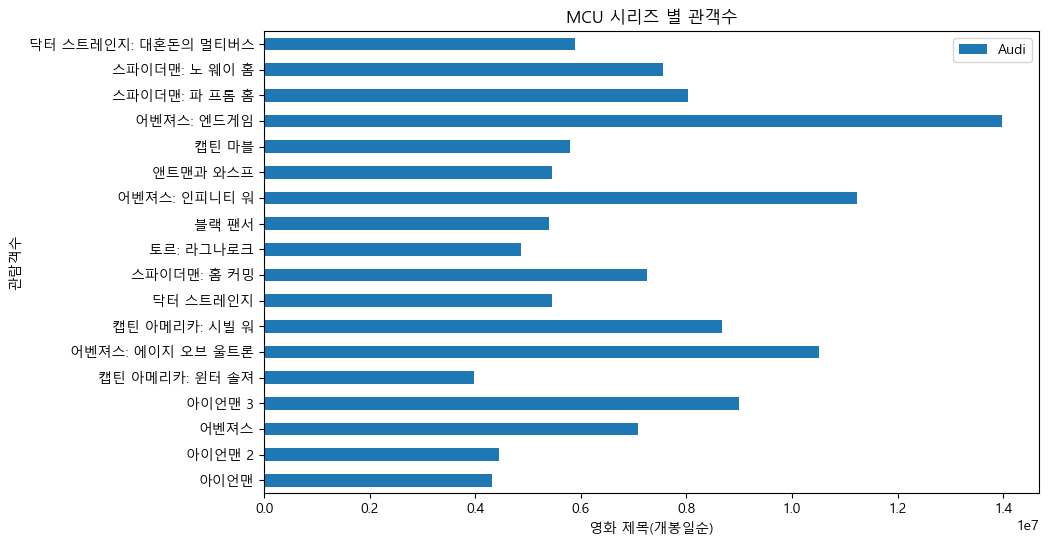

In [48]:
result.plot(kind='barh', x='Title', y='Audi', figsize=(10, 6))

for title in result['Title'].unique():
    plt.axhline(y=10000000, color='g', label='10M')

plt.title('MCU 시리즈 별 관객수')
plt.xlabel('영화 제목(개봉일순)')
plt.ylabel('관람객수')

plt.show()

## 영화이름 이쁘게~

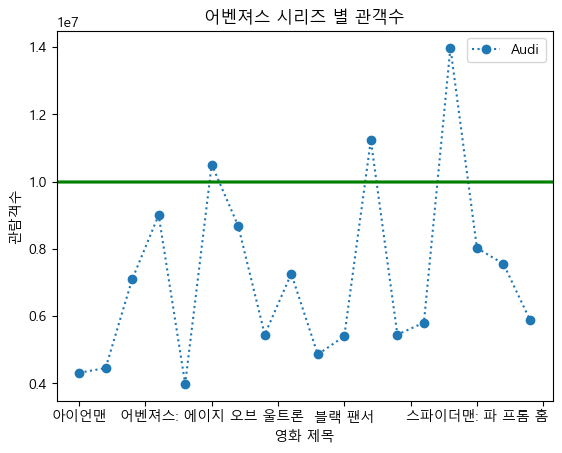

In [38]:
result.plot(kind='line', x='Title', y='Audi', linestyle="dotted", marker="o")

for title in result['Title'].unique():
    plt.axhline(y=10000000, color='g', label='10M')

plt.title('어벤져스 시리즈 별 관객수')
plt.xlabel('영화 제목')
plt.ylabel('관람객수')

plt.show()

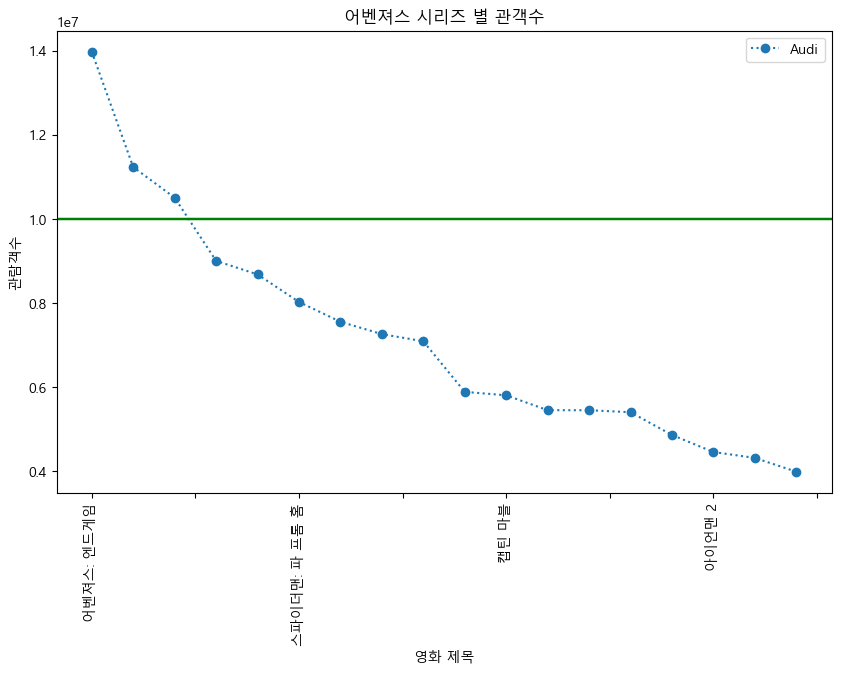

In [144]:
result = result.sort_values(by='Audi', ascending=False)
top3 = result.head(3)['Title'].tolist()
bottom3 = result.tail(3)['Title'].tolist()

# 그래프 그리기
result.plot(kind='line', x='Title', y='Audi', figsize=(10, 6), linestyle="dotted", marker="o")

# 상위 3개와 하위 3개에 대한 label 추가
for title in top3+bottom3:
    plt.axhline(y=10000000, color='g')
    
# 그래프 제목, 축 제목 설정
plt.title('어벤져스 시리즈 별 관객수')
plt.xlabel('영화 제목')
plt.ylabel('관람객수')
plt.xticks(rotation=90)

plt.legend()  # legend 표시

plt.show()

In [13]:
df1=df[df["title"]=="어벤져스+[:가+힇]"]



KeyError: 'title'